In [1]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

In [2]:
raw = "https://raw.githubusercontent.com/wmgeolab/geoBoundaries/"
fold = "/releaseData/gbOpen/"

In [3]:
nga_crop = pd.read_stata('data/NGA_corn_adm1_gmfd_v3.dta')
nga_crop.to_csv('data/ZMB_corn_adm1_gmfd_v3.csv')

In [4]:
tza_crop = pd.read_stata('data/TZA_corn_adm2_gmfd_v3.dta')
tza_crop.to_csv('data/TZA_corn_adm2_gmfd_v3.csv')

In [5]:
zmb_crop = pd.read_stata('data/ZMB_corn_adm2_gmfd_v1.dta')
zmb_crop.to_csv('data/ZMB_corn_adm2_gmfd_v1.csv')

In [6]:
nga_commit = "a90abba87859f8560df84d1a03920442f76fad2c"
nga_geo = "NGA/ADM2/geoBoundaries-NGA-ADM2_simplified.geojson"
nga_url = raw + nga_commit + fold + nga_geo
nga_shp = gpd.read_file(nga_url)

In [7]:
tza_commit = "77402fbfa563a6808db3f009283bfa11c75eb836"
tza_geo = "TZA/ADM2/geoBoundaries-TZA-ADM2_simplified.geojson"
tza_url = raw + tza_commit + fold + tza_geo
tza_shp = gpd.read_file(tza_url)

In [8]:
zmb_commit = "ba7b3ab481359205226ac8712f07326d6a7edb3d"
zmb_geo = "ZMB/ADM2/geoBoundaries-ZMB-ADM2.geojson"
zmb_url = raw + zmb_commit + fold + zmb_geo
zmb_shp = gpd.read_file(zmb_url)

In [9]:
nga_joined = nga_shp.join(other = nga_crop)

In [10]:
tza_joined = tza_shp.join(other = tza_crop)

In [11]:
zmb_joined = zmb_shp.join(other = zmb_crop)

In [12]:
gdf = nga_joined.append(tza_joined).append(zmb_joined)

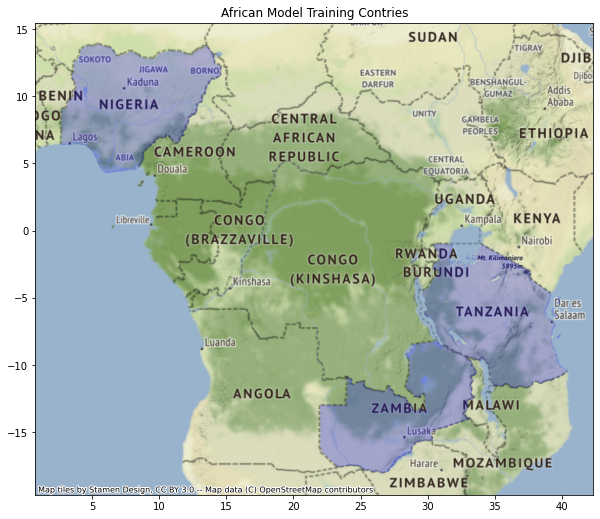

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    ax = ax
    , color = "blue"
    # , cmap = "viridis"
    # , column = 'cropped_ha'
    # , legend  = True
    , alpha = .25
)

ax.grid(False)
ax.set_title('African Model Training Contries', fontsize=12)

ctx.add_basemap(ax, crs="EPSG:4326")